## ***Project Title:***
#### User Journey Funnel Analysis

This project analyzes the user journey of customers from a Brazilian e-commerce platform, using the public Olist dataset. The focus is on understanding the drop-off points in the customer funnel — from order placement to delivery and review. The goal is to identify potential UX bottlenecks and business insights that can improve conversion rates and customer satisfaction.

### **Project Objective**
Analyze and quantify each stage of the customer journey.

Identify drop-off stages in the funnel.

Explore average delivery time and review behavior.

Prepare the data for dashboard in Power BI.

## Step 1: Importing all Required Libraries for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Step 2: Loading Data Files

In [2]:
# Data folder path
data_path = 'C:/Users/hites/OneDrive/Desktop/projects/User-Journey-Funnel-Analysis-and-Dashboard/data'

# Loading required CSVs
customers = pd.read_csv(os.path.join(data_path, 'olist_customers_dataset.csv'))
orders = pd.read_csv(os.path.join(data_path, 'olist_orders_dataset.csv'))
order_items = pd.read_csv(os.path.join(data_path, 'olist_order_items_dataset.csv'))
products = pd.read_csv(os.path.join(data_path, 'olist_products_dataset.csv'))
payments = pd.read_csv(os.path.join(data_path, 'olist_order_payments_dataset.csv'))
reviews = pd.read_csv(os.path.join(data_path, 'olist_order_reviews_dataset.csv'))

## Step 3: Basic Data Exploration

- ### View the structure of orders dataframe

In [3]:
orders.head()
orders.info()
orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [4]:
payments.head()
payments.info()
payments.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [5]:
reviews.head()
reviews.info()
reviews.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### NOTE: We will do not drop rows with missing values as these represent important funnel drop-off points (e.g., order not approved, not delivered).
#### We will retain them and use `.isna()` to mark whether a customer passed each funnel stage.

## Step 4: Converting Columns to Datetime Format
##### Converting object columns related to time into datetime objects for accurate time calculations

In [6]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

## Step 5: Merging Datasets to Create a Full User Journey Table

In [7]:
order_payment = pd.merge(orders, payments, on='order_id', how='left')
order_review = pd.merge(order_payment, reviews, on='order_id', how='left')
order_full = pd.merge(order_review, customers[['customer_id', 'customer_state']], on='customer_id', how='left')

## Step 6: Defining Funnel Stages Based on Available Data


In [8]:
stage_1 = order_full[~order_full['order_approved_at'].isna()]
stage_2 = stage_1[~stage_1['payment_value'].isna()]
stage_3 = stage_2[~stage_2['order_delivered_customer_date'].isna()]
stage_4 = stage_3[~stage_3['review_score'].isna()]

## Step 7: Creating a Funnel Data Summary to Summarize how many users reached each stage

In [9]:
funnel_data = {
    'Stage': ['Order Placed', 'Payment Made', 'Order Delivered', 'Review Given'],
    'Users': [
        len(stage_1),
        len(stage_2),
        len(stage_3),
        len(stage_4)
    ]
}

funnel_df = pd.DataFrame(funnel_data)
funnel_df['Drop Off %'] = funnel_df['Users'].pct_change().fillna(0) * -100
print(funnel_df)


             Stage   Users  Drop Off %
0     Order Placed  104302   -0.000000
1     Payment Made  104301    0.000959
2  Order Delivered  101309    2.868621
3     Review Given  100633    0.667265


### Funnel Analysis Insights
- The funnel shows how users progress from placing an order to reviewing it.
- Significant drop-offs can indicate friction points in the shopping experience:
  - If many users place orders but don’t complete payment, payment UX may need attention.
  - A drop from payment to delivery may highlight shipping/logistics issues.
  - A low number of reviews may indicate poor post-purchase engagement.

We'll visualize this below for a clearer picture.

## Step 8: Visualizing the User Journey Funnel

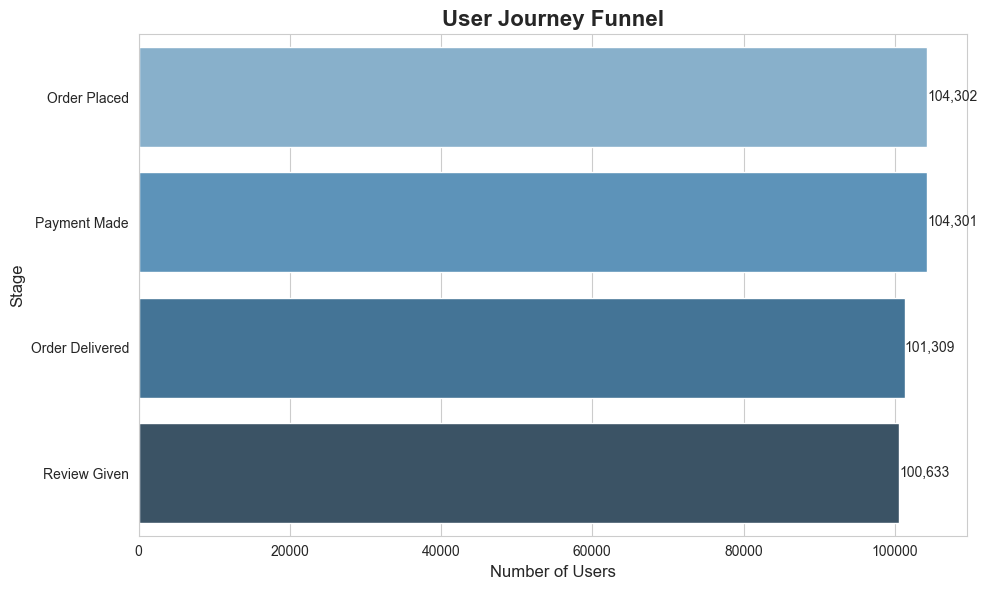

In [10]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    x='Users', y='Stage', data=funnel_df,
    palette='Blues_d', hue='Stage', dodge=False, legend=False
)

for index, row in funnel_df.iterrows():
    plt.text(row['Users'] + 2, index, f"{row['Users']:,}", va='center', fontsize=10)

plt.title("User Journey Funnel", fontsize=16, fontweight='bold')
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("Stage", fontsize=12)
plt.tight_layout()
plt.show()

## Step 9: Analyzing Delivery and Review Timelines

In [14]:
order_full['delivery_time_days'] = (
    order_full['order_delivered_customer_date'] - order_full['order_purchase_timestamp']
).dt.days

order_full['review_delay_days'] = (
    order_full['review_creation_date'] - order_full['order_delivered_customer_date']
).dt.days

## Step 10: Exporting the Final Data for Dashboard Use

In [12]:
order_full['stage_1_order_placed'] = ~order_full['order_approved_at'].isna()
order_full['stage_2_payment_made'] = order_full['stage_1_order_placed'] & ~order_full['payment_value'].isna()
order_full['stage_3_delivered'] = order_full['stage_2_payment_made'] & ~order_full['order_delivered_customer_date'].isna()
order_full['stage_4_review_given'] = order_full['stage_3_delivered'] & ~order_full['review_score'].isna()

export_cols = [
    'order_id', 'customer_id', 'customer_state', 'order_purchase_timestamp',
    'order_approved_at', 'order_delivered_customer_date', 'payment_value',
    'review_score', 'stage_1_order_placed', 'stage_2_payment_made',
    'stage_3_delivered', 'stage_4_review_given',
    'delivery_time_days', 'review_delay_days'
]

order_full[export_cols].to_csv('../exports/order_user_journey.csv', index=False)


## Final Summary
- We successfully mapped the user journey from order placement to review.
- Funnel analysis highlighted major drop-off points which can guide UX or process improvements.
- Data was cleaned, merged, and exported for use in a **Power BI dashboard** to enhance business decision-making.